In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Dataset/train.csv',low_memory=False, parse_dates=['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [3]:
dfg = df.groupby('Store')
dfg

In [4]:
store_avg = dfg.mean()
store_avg.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [5]:
dfg.mean()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590
...,...,...,...,...,...,...
1111,3.997877,4342.968153,373.548832,0.826964,0.382166,0.180467
1112,3.997877,8465.280255,693.498938,0.826964,0.382166,0.180467
1113,3.997877,5516.180467,596.763270,0.832272,0.382166,0.168790


<AxesSubplot:title={'center':'Avg'}, xlabel='Store', ylabel='Sales'>

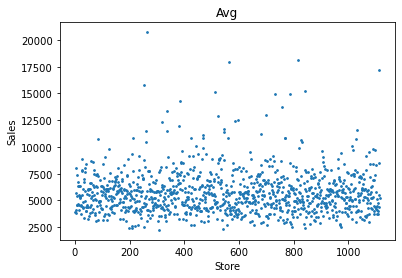

In [7]:
store_avg.reset_index(inplace=True)
store_avg.plot.scatter('Store','Sales', s=3, title='Avg')

In [8]:
store_day = df.groupby(['Store','DayOfWeek'], as_index=False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


In [9]:
import matplotlib.pylab as plt

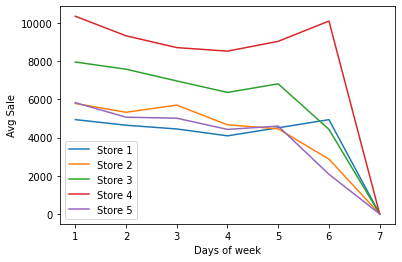

In [13]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales,label = f"Store {store}")
    plt.xlabel('Days of week')
    plt.ylabel('Avg Sale')
    plt.legend()
    

# Grouping Imputation

In [14]:
df = pd.read_csv('./Dataset/train.csv',low_memory=False, parse_dates=['Date'])
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


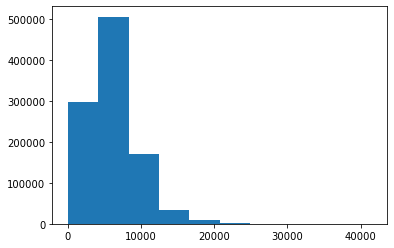

In [16]:
plt.hist(df.Sales)

(844392, 9)


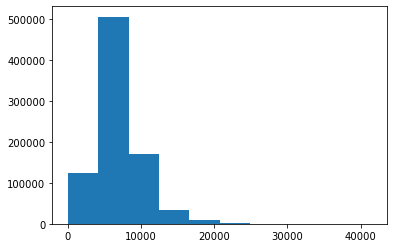

In [17]:
df=df[df.Open == 1].copy()
plt.hist(df.Sales)
print(df.shape)

In [20]:
mask = np.random.choice(10, size=df.shape[0]) == 0
df['NewSales'] = df.Sales.copy()

array([False, False, False, ..., False, False, False])

(array([1.96686e+05, 4.54471e+05, 1.52574e+05, 2.98360e+04, 8.01800e+03,
        2.11800e+03, 5.03000e+02, 1.53000e+02, 2.50000e+01, 8.00000e+00]),
 array([    0. ,  4155.1,  8310.2, 12465.3, 16620.4, 20775.5, 24930.6,
        29085.7, 33240.8, 37395.9, 41551. ]),
 <BarContainer object of 10 artists>)

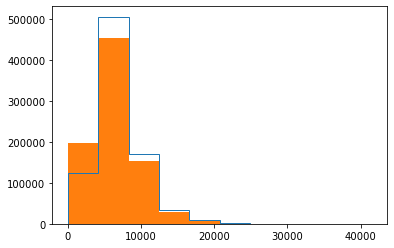

In [19]:
df.loc[mask,'NewSales'] = np.nan
plt.hist(df.Sales, label='Original', histtype='step')
plt.hist(df.NewSales.fillna(0), label = 'corr')